In [65]:
import data_smoothing
import find_peaks
import peak_character
import peak_classify
import feature_visualizer

In [2]:
data_nm, data_time, data_z = data_smoothing.load_data('20180418_twogaussian_spectralshfit.txt')

In [3]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [4]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [22]:
corrected_output = peak_classify.data_grouping(idx, height, fwhm)

In [23]:
peak_dict = peak_classify.cluster_classifier(idx, corrected_output)

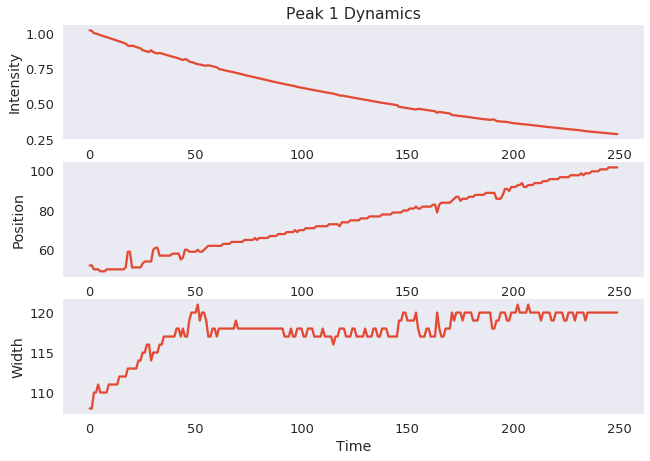

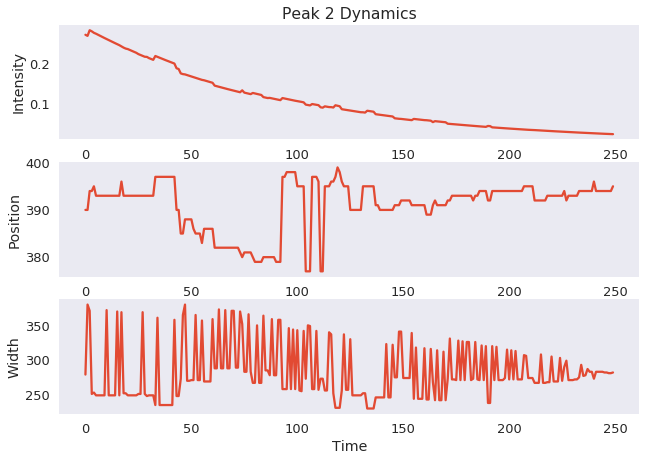

In [66]:
output = feature_visualizer.visualize(peak_dict)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize(peak_dict):
    for i in range(len(peak_dict)):
        df = pd.DataFrame(peak_dict['peak_%s' % i], columns=['Position', 'Height', 'Width', 'Time'])
        
        plt.subplot(3, 1, 1)
        plt.plot(df['Time'], df['Height'])
        plt.title('Peak %s Dynamics' % (i+1))
        plt.ylabel('Intensity')

        plt.subplot(3, 1, 2)
        plt.plot(df['Time'], df['Position'])
        plt.ylabel('Position')

        plt.subplot(3, 1, 3)
        plt.plot(df['Time'], df['Width'])
        plt.ylabel('Width')
        plt.xlabel('Time')
        plt.show()
    return